In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
sample=pd.read_csv('sample_submission.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [3]:
sample.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
print('unique values in Destination',test['Destination'].unique())
unique_values =test['Destination'].unique()
value_to_int = {value: i for i, value in enumerate(unique_values)}
test['Destination'] = test['Destination'].replace(value_to_int)
print('unique values in Destination',test['Destination'].unique())

print('unique values in HomePlanet',test['HomePlanet'].unique())
unique_values =test['HomePlanet'].unique()
value_to_int = {value: i for i, value in enumerate(unique_values)}
test['HomePlanet'] = test['HomePlanet'].replace(value_to_int)
print('unique values in HomePlanet',test['HomePlanet'].unique())

unique values in Destination ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]
unique values in Destination [0. 1. 2. 3.]
unique values in HomePlanet ['Earth' 'Europa' 'Mars' nan]
unique values in HomePlanet [0. 1. 2. 3.]


In [8]:
def convert_to_bool(value):
  try:
    return bool(value) 
  except ValueError:  
    return False 
test['CryoSleep']= [convert_to_bool(item) for item in test['CryoSleep']]
test['VIP']= [convert_to_bool(item) for item in test['VIP']]

In [9]:
total_nan_values = test.isna().sum().sum()

# Count NaN values in each column
nan_counts_per_column = test.isna().sum()

# Print the results
print(f"Total NaN values: {total_nan_values}")
print("NaN counts per column:")
print(nan_counts_per_column)

Total NaN values: 752
NaN counts per column:
PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age              91
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [10]:
for i in ['VRDeck','Age','RoomService','FoodCourt','ShoppingMall','Spa']:
    test[i] = test[i].fillna(test[i].mean())
total_nan_values = test.isna().sum().sum()

# Count NaN values in each column
nan_counts_per_column = test.isna().sum()

# Print the results
print(f"Total NaN values: {total_nan_values}")
print("NaN counts per column:")
print(nan_counts_per_column)

Total NaN values: 194
NaN counts per column:
PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64


In [11]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [13]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [14]:
print('unique values in Destination',train['Destination'].unique())
unique_values =train['Destination'].unique()
value_to_int = {value: i for i, value in enumerate(unique_values)}
train['Destination'] = train['Destination'].replace(value_to_int)
print('unique values in Destination',train['Destination'].unique())

unique values in Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
unique values in Destination [0. 1. 2. 3.]


In [15]:
print('unique values in HomePlanet',train['HomePlanet'].unique())
unique_values =train['HomePlanet'].unique()
value_to_int = {value: i for i, value in enumerate(unique_values)}
train['HomePlanet'] = train['HomePlanet'].replace(value_to_int)
print('unique values in HomePlanet',train['HomePlanet'].unique())

unique values in HomePlanet ['Europa' 'Earth' 'Mars' nan]
unique values in HomePlanet [0. 1. 2. 3.]


In [16]:
def convert_to_bool(value):
  try:
    return bool(value) 
  except ValueError:  
    return False 
train['CryoSleep']= [convert_to_bool(item) for item in train['CryoSleep']]
train['VIP']= [convert_to_bool(item) for item in train['VIP']]

In [17]:
train=train.drop(['Cabin','Name'],axis=1)
test=test.drop(['Cabin','Name'],axis=1)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   float64
 2   CryoSleep     8693 non-null   bool   
 3   Destination   8693 non-null   float64
 4   Age           8514 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(3), float64(8), object(1)
memory usage: 636.8+ KB


In [19]:
total_nan_values = train.isna().sum().sum()

# Count NaN values in each column
nan_counts_per_column = train.isna().sum()

# Print the results
print(f"Total NaN values: {total_nan_values}")
print("NaN counts per column:")
print(nan_counts_per_column)

Total NaN values: 1122
NaN counts per column:
PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64


In [20]:
for i in ['VRDeck','Age','RoomService','FoodCourt','ShoppingMall','Spa']:
    train[i] = train[i].fillna(train[i].mean())
total_nan_values = train.isna().sum().sum()

# Count NaN values in each column
nan_counts_per_column = train.isna().sum()

# Print the results
print(f"Total NaN values: {total_nan_values}")
print("NaN counts per column:")
print(nan_counts_per_column)

Total NaN values: 0
NaN counts per column:
PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


In [21]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,0.0,False,0.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,1.0,False,0.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,0.0,False,0.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,0.0,False,0.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,1.0,False,0.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True


<Axes: xlabel='Age', ylabel='FoodCourt'>

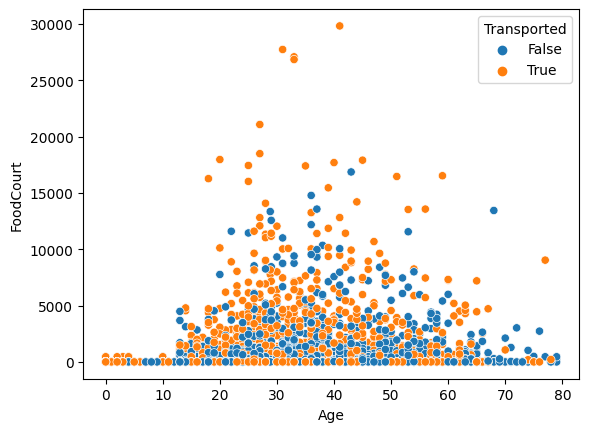

In [22]:
sns.scatterplot(x='Age',y='FoodCourt',data=train,hue='Transported')

<Axes: xlabel='Age', ylabel='RoomService'>

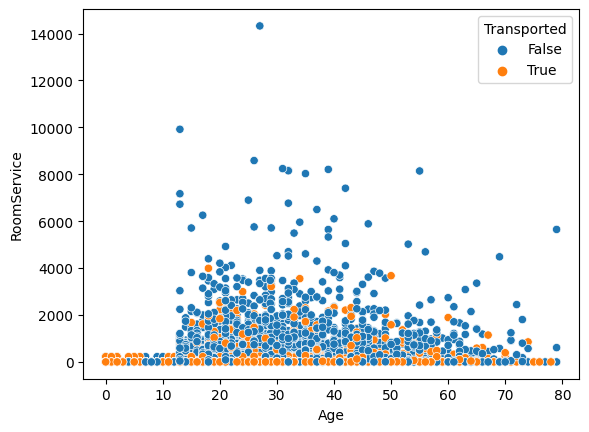

In [23]:
sns.scatterplot(x='Age',y='RoomService',data=train,hue='Transported')

<Axes: xlabel='Age', ylabel='ShoppingMall'>

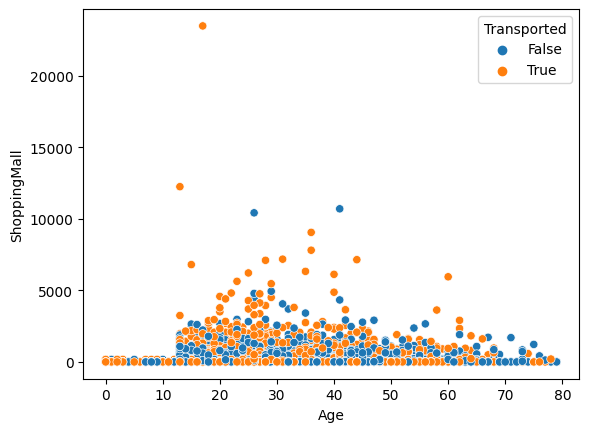

In [24]:
sns.scatterplot(x='Age',y='ShoppingMall',data=train,hue='Transported')

<Axes: xlabel='Age', ylabel='Spa'>

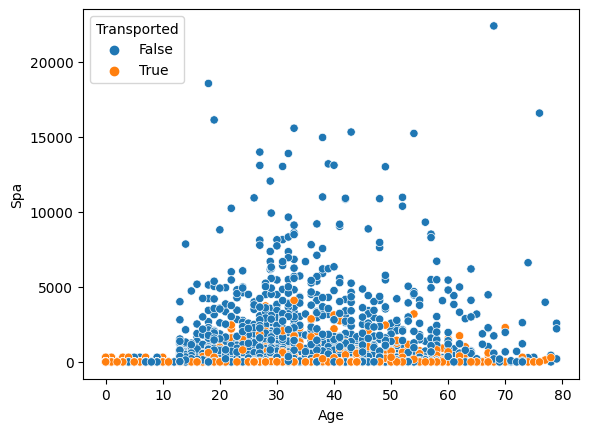

In [25]:
sns.scatterplot(x='Age',y='Spa',data=train,hue='Transported')

<Axes: xlabel='Age', ylabel='VRDeck'>

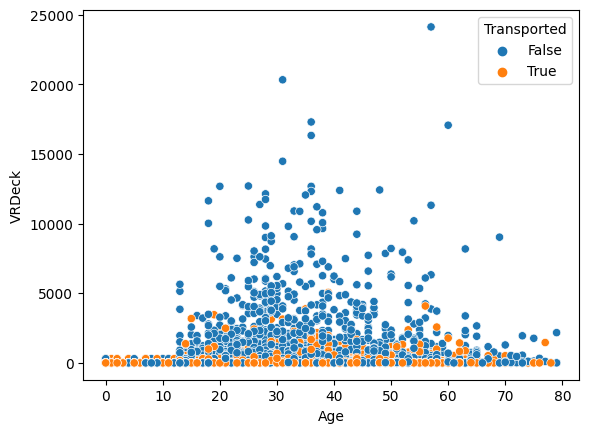

In [26]:
sns.scatterplot(x='Age',y='VRDeck',data=train,hue='Transported')

<Axes: xlabel='HomePlanet', ylabel='Destination'>

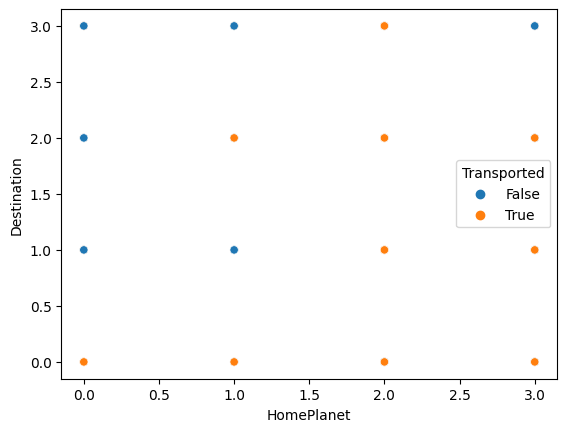

In [27]:
sns.scatterplot(x='HomePlanet',y='Destination',data=train,hue='Transported')

In [28]:
from sklearn.model_selection import train_test_split
X=train.drop('PassengerId',axis=1)
y=train['PassengerId']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [29]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
prediction=svm.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

     0001_01       0.00      0.00      0.00       1.0
     0003_01       0.00      0.00      0.00       0.0
     0004_01       0.00      0.00      0.00       0.0
     0005_01       0.00      0.00      0.00       1.0
     0006_02       0.00      0.00      0.00       0.0
     0007_01       0.00      0.00      0.00       1.0
     0008_01       0.00      0.00      0.00       1.0
     0008_02       0.00      0.00      0.00       1.0
     0014_01       0.00      0.00      0.00       0.0
     0015_01       0.00      0.00      0.00       1.0
     0017_02       0.00      0.00      0.00       1.0
     0020_01       0.00      0.00      0.00       1.0
     0020_03       0.00      0.00      0.00       0.0
     0020_05       0.00      0.00      0.00       1.0
     0020_06       0.00      0.00      0.00       1.0
     0024_01   

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklea

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
prediction=lr.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

     0001_01       0.00      0.00      0.00       1.0
     0003_01       0.00      0.00      0.00       0.0
     0005_01       0.00      0.00      0.00       1.0
     0007_01       0.00      0.00      0.00       1.0
     0008_01       0.00      0.00      0.00       1.0
     0008_02       0.00      0.00      0.00       1.0
     0008_03       0.00      0.00      0.00       0.0
     0015_01       0.00      0.00      0.00       1.0
     0017_02       0.00      0.00      0.00       1.0
     0020_01       0.00      0.00      0.00       1.0
     0020_05       0.00      0.00      0.00       1.0
     0020_06       0.00      0.00      0.00       1.0
     0025_01       0.00      0.00      0.00       1.0
     0026_01       0.00      0.00      0.00       1.0
     0031_01       0.00      0.00      0.00       0.0
     0035_01   

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
prediction=rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
prediction=dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km.fit(X_train,y_train)
prediction=km.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

In [ ]:
pred=lr.predict(test)
print(pred[:5])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))